## **Mount implementation folder in google drive**

In [3]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [4]:
%cd /content/drive/MyDrive/FYP/Implementation/data
! ls

/content/drive/.shortcut-targets-by-id/1MkC_V0CRXkQ-OsCBxF38m1Sku4w4s3TR/FYP/Implementation/data
encoded-data.csv	selected_columns_all.csv  UNSW-NB15_1.csv
NUSW-NB15_features.csv	selected_columns.csv	  UNSW-NB15_2.csv
OTset.csv		selected_columns_dos.csv  UNSW-NB15_3.csv
preprocessing.csv	SVR-predict-data.csv	  UNSW-NB15_4.csv
preprosessing-dos.csv	testset.csv


## **get only normal data**

data = (X, Y)

In [42]:
import pandas as pd
from sklearn.utils import shuffle
df = pd.read_csv('encoded-data.csv', sep=',', on_bad_lines='skip', index_col=False)
attack_labels = ['Analysis', 'Backdoors', 'DoS', 'Exploits', 'Fuzzers', 'Generic', 'Reconnaissance', 'Shellcode', 'Worms'] + ['attack_cat','Label']


#trainign data
DoS_attacks = df[df['DoS'] == 1]
Normal_Data = df[df['DoS'] == 0].sample(n=100000)
frames = [DoS_attacks, Normal_Data]
result = pd.concat(frames)
# result = shuffle(result)
X=Normal_Data.drop(labels=attack_labels, axis=1)
Y=result[['DoS']]
X.head()





,srcip,sport,dstip,dsport,proto,state,dur,sbytes,dbytes,sttl,...,Dintpkt,tcprtt,synack,ackdat,is_sm_ips_ports,ct_state_ttl,ct_srv_src,ct_dst_ltm,ct_src_ ltm,ct_dst_sport_ltm
555996,37,91474,24,323,114,5,0.032675,7804,14860,31,...,0.256824,0.000680,0.000567,0.000113,0,0,5,3,6,1
220623,38,71794,9,37,114,5,0.025533,37292,3380,31,...,0.609390,0.000676,0.000535,0.000141,0,0,2,2,2,1
915838,38,103570,8,26753,114,5,1.633039,12830,548216,31,...,3.735645,0.000786,0.000556,0.000230,0,0,5,3,4,1
1194782,38,328822,20,273,120,2,0.272306,568,320,31,...,85.654664,0.000000,0.000000,0.000000,0,0,3,2,3,1
306138,30,0,14,0,53,6,0.000009,86,0,254,...,0.000000,0.000000,0.000000,0.000000,0,2,1,1,1,1


##**Normalize the training data**

Data = (x_train, y_train)

In [43]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

#get select columns for training
select_col=pd.read_csv("selected_columns_all.csv", sep=',', on_bad_lines='skip', index_col=False)
columns=list(select_col['DoS'])

x_train=X[columns]

x_train.head()

X_train_DoS_normalized = preprocessing.normalize(x_train)
X_train_DoS_normalized 


array([[4.73781871e-03, 3.07317970e-03, 1.45976036e-02, ...,
        3.26525344e-02, 8.19514588e-03, 1.28049154e-04],
       [1.01876722e-03, 2.41286974e-04, 3.05630167e-03, ...,
        6.83646425e-03, 1.92225289e-02, 2.68096637e-05],
       [2.96104636e-03, 6.23378182e-04, 8.88313909e-03, ...,
        1.98701795e-02, 4.51949182e-03, 7.79222727e-05],
       ...,
       [3.06972402e-02, 8.59522727e-02, 3.68366883e-01, ...,
        0.00000000e+00, 4.05203571e-01, 2.76275162e-02],
       [7.63874563e-02, 5.09249709e-02, 2.63883940e-01, ...,
        5.90266708e-01, 1.22682884e-01, 2.31477140e-03],
       [2.68651103e-02, 1.48221298e-02, 1.05607675e-01, ...,
        2.36227694e-01, 8.98591621e-02, 9.26383115e-04]])

## **Create Test Set for DOS attacks**

Data = (x_test_DOS_normalized, y_test)

In [44]:
import pandas as pd
import numpy as np
select_col=pd.read_csv("selected_columns_all.csv", sep=',', on_bad_lines='skip', index_col=False)

columns=list(select_col['DoS'])

test_data =pd.read_csv("testset.csv", sep=',', on_bad_lines='skip', index_col=False)
attack_labels = ['Analysis', 'Backdoors', 'DoS', 'Exploits', 'Fuzzers', 'Generic', 'Reconnaissance', 'Shellcode', 'Worms'] + ['attack_cat','Label']
attack_categories = ['Analysis', 'Backdoors', 'DoS', 'Exploits', 'Fuzzers', 'Generic', 'Reconnaissance', 'Shellcode', 'Worms'] 


for i in attack_categories:
  test_data[i] = test_data['attack_cat'].apply(lambda x: 1 if x == i else 0)

x_test=test_data[columns]
y_test= test_data['DoS']

x_test = x_test.replace('-','')
x_test = x_test.replace(r'^\s*$', np.nan, regex=True)

#delete raws with missing values
for i in x_test.columns.values.tolist():
  i = x_test.loc[x_test[i].isnull()].index
  x_test = x_test.drop(index=list(i))
  y_test = y_test.drop(index=list(i))

percent_missing = x_test.isnull().sum()
missing_value_df = pd.DataFrame({'column_name': x_test.columns, 'count_missing': percent_missing, 'To be dropped': (percent_missing > 45)})
# print(missing_value_df)

x_test.head()
#encode the data
from sklearn.preprocessing import LabelEncoder

# # replace hex with int
# x_test['sport'] = x_test['sport'].astype(str).apply(int, base=16)
# x_test['dsport'] = x_test['dsport'].astype(str).apply(int, base=16)

# #Create an instance of Label-encoder
labelencoder = LabelEncoder() 

# encode columns consists with strings
x_test['srcip'] = labelencoder.fit_transform(x_test['srcip'])
x_test['dstip'] = labelencoder.fit_transform(x_test['dstip'])
x_test['proto'] = labelencoder.fit_transform(x_test['proto'])
x_test['state'] = labelencoder.fit_transform(x_test['state'])

from sklearn import preprocessing
X_test_DoS_normalized = preprocessing.normalize(x_test)
X_test_DoS_normalized

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (1,3) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


array([[9.41893810e-03, 6.37163460e-03, 3.10270902e-02, ...,
        7.06420358e-02, 1.66216555e-02, 2.77027591e-04],
       [4.29874801e-02, 9.21160287e-02, 3.62323046e-01, ...,
        0.00000000e+00, 4.05310526e-01, 5.21990829e-02],
       [8.24193899e-03, 5.02557256e-03, 2.25145651e-02, ...,
        5.12608401e-02, 1.16593283e-02, 2.01022902e-04],
       ...,
       [5.71680195e-02, 3.39435116e-02, 2.10807072e-01, ...,
        0.00000000e+00, 2.35818081e-01, 1.78650061e-03],
       [6.42691451e-02, 4.67411964e-02, 2.18125583e-01, ...,
        4.96625212e-01, 1.03220142e-01, 1.94754985e-03],
       [8.90867779e-03, 6.55049837e-03, 2.93462327e-02, ...,
        6.68150834e-02, 5.52862063e-02, 2.62019935e-04]])

##**one class SVM**

In [46]:
# Fitting Random Forest Regression to the dataset
from sklearn.svm import OneClassSVM
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

#training data
x = np.array(X_train_DoS_normalized )
x_test=np.array(X_test_DoS_normalized)
# y = np.array(Y)
y_test=np.array(y_test)

svm = OneClassSVM(kernel='rbf',gamma=0.2, nu=0.001)
svm.fit(x)



OneClassSVM(gamma=0.2, nu=0.001)

**Predict on test set**

In [47]:
predict=svm.predict(x_test)
score = svm.score_samples(x_test)
score

array([84.7319542 , 88.03657405, 84.52816217, ..., 86.87752356,
       86.72852499, 84.94039737])

##**Customized threshold**

In [48]:
# Check the score for 2% of outliers
score_threshold = np.percentile(score, 10)
print(f'The customized score threshold for 1% of outliers is {score_threshold:.2f}')# Check the model performance at 2% threshold
customized_prediction = [1 if i < score_threshold else 0 for i in score]

The customized score threshold for 1% of outliers is 84.46


In [50]:
from sklearn.metrics import accuracy_score
print(round(accuracy_score(y_test, customized_prediction), 6))

0.894335


##**Test Set Accuracy**

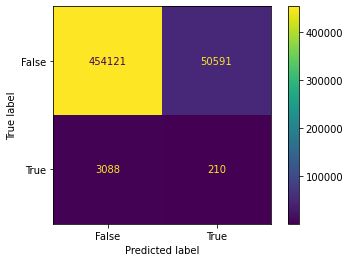

In [51]:
from sklearn import metrics
import matplotlib.pyplot as plt

predict= [1 if i==-1 else 0 for i in predict]
confusion_matrix = metrics.confusion_matrix(y_test, customized_prediction)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show() 

